<a href="https://colab.research.google.com/github/shivanidhar29/projects/blob/main/Assignment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import tensorflow_probability as tfp
tfd= tfp.distributions

tasksDF=pd.read_csv('/content/drive/MyDrive/PERT-CPM.csv')
taskNames=tasksDF['tasks']

simulationDF=pd.DataFrame(columns=taskNames)

print(simulationDF.columns)
for index,task in tasksDF.iterrows():
  dist=tfd.PERT(low=task['best'], peak=task['mostL'], high=task['worst'], temperature=4)
  simulationDF[task['tasks']]=dist.sample(1000)

print(simulationDF.head(2))




Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'EOP'], dtype='object', name='tasks')
tasks         A         B         C         D         E         F         G  \
0      5.304821  3.361370  3.227203  2.902207  5.533525  2.471466  3.517061   
1      6.484575  4.908215  3.448657  2.870769  5.828218  2.401119  9.274237   

tasks         H          I         J  EOP  
0      2.723530   9.147891  1.835042  NaN  
1      7.094183  12.952802  2.422005  NaN  


In [15]:

paths=['ABEJ','BCDEJ','BCFGJ','BCFHJ','BI']

pathsDF=pd.DataFrame(columns=paths)
ADEJ=[]
BCDEJ=[]
BCFGJ=[]
BCFHJ=[]
BI=[]

for index,row in simulationDF.iterrows():
  ADEJ.append(row['A']+row['D']+row['E']+row['J'])
  BCDEJ.append(row['B']+row['C']+row['D']+row['E']+row['J'])
  BCFGJ.append(row['B']+row['C']+row['F']+row['G']+row['J'])
  BCFHJ.append(row['B']+row['C']+row['F']+row['H']+row['J'])
  BI.append(row['B']+row['I'])

pathsDF['ABEJ']=ADEJ
pathsDF['BCDEJ']=BCDEJ
pathsDF['BCFGJ']=BCFGJ
pathsDF['BCFHJ']=BCFHJ
pathsDF['BI']=BI
print(pathsDF.head(2))



        ABEJ      BCDEJ      BCFGJ      BCFHJ         BI
0  15.575594  16.859346  14.412142  13.618611  12.509261
1  17.605566  19.477863  22.454231  20.274178  17.861017


In [17]:
pathsDF['Critical Path'] = pathsDF.idxmax(axis=1)


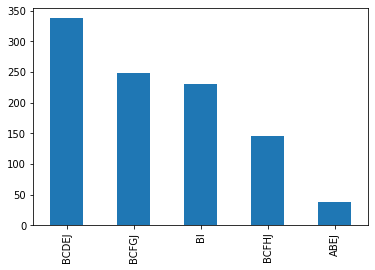

In [18]:
from pandas._libs.hashtable import value_count
pathsDF['Critical Path'].value_counts().plot.bar()